# Morfología<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**
---

Extraido de [Tutorial de OpenCV](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html)

Este código se basa en opencv, también estas operaciones morfológicas se encuentran en la librería [scikit-image](https://scikit-image.org/docs/dev/api/skimage.morphology.html).

# Operaciones morfológicas con imágenes binarias

In [1]:
!wget https://www.dropbox.com/s/093zihgdrqoxofn/jota.png?dl=0

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


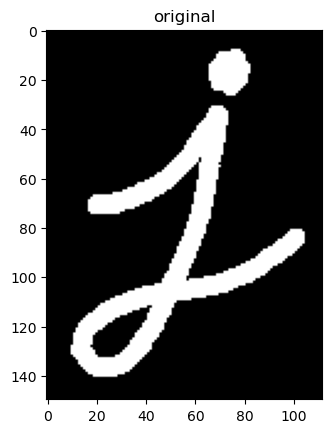

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('jota.png',0)
plt.imshow(img,cmap='gray')
plt.title('original')
plt.show()


# Erosion

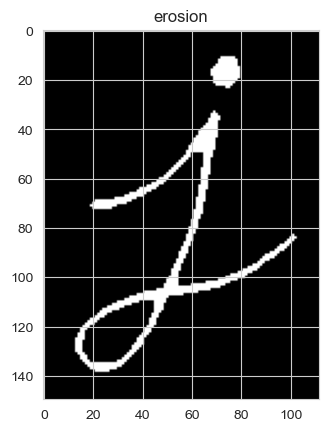

In [27]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion,cmap='gray')
plt.title('erosion')
plt.show()


# Dilatación

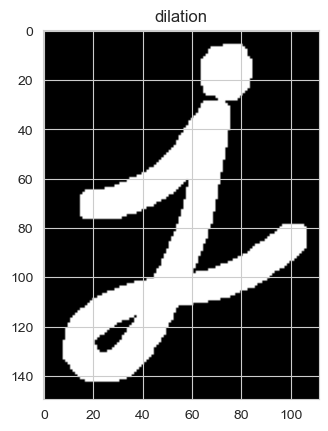

In [28]:
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation,cmap='gray')
plt.title('dilation')
plt.show()


# Opening

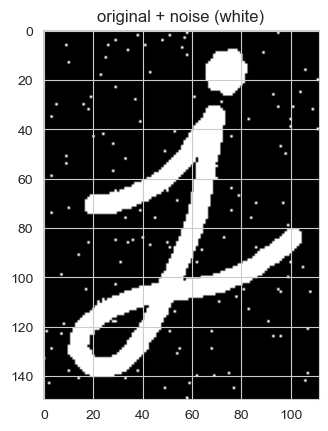

In [29]:
(N,M) = img.shape

img_noise = img.copy()

for i in range(N):
  for j in range(M):
    if np.random.rand()>0.99:
      img_noise[i,j] = 255

plt.imshow(img_noise,cmap='gray')
plt.title('original + noise (white)')
plt.show()

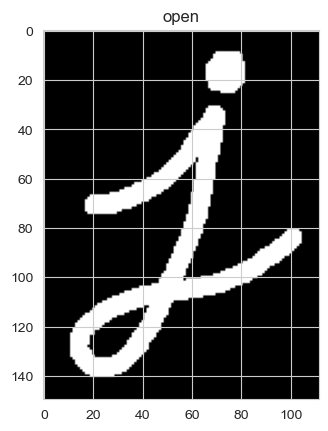

In [30]:
opening = cv2.morphologyEx(img_noise, cv2.MORPH_OPEN, kernel)
plt.imshow(opening,cmap='gray')
plt.title('open')
plt.show()

# Closing

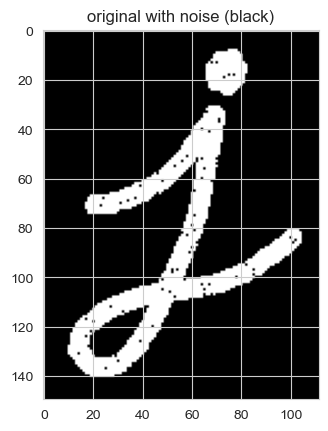

In [31]:
(N,M) = img.shape

img_noise = img.copy()

for i in range(N):
  for j in range(M):
    if np.random.rand()>0.97:
      img_noise[i,j] = 0

plt.imshow(img_noise,cmap='gray')
plt.title('original with noise (black)')
plt.show()

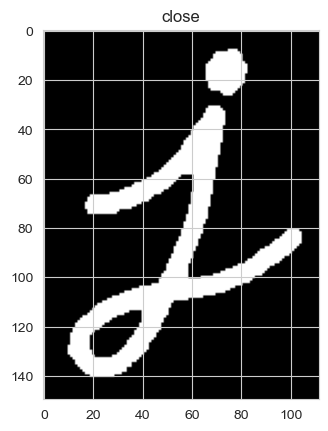

In [32]:
closing = cv2.morphologyEx(img_noise, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap='gray')
plt.title('close')
plt.show()

# Fill holes

In [33]:
def fillhole(input_image):
    '''
    input gray binary image  get the filled image by floodfill method
    Note: only holes surrounded in the connected regions will be filled.
    :param input_image:
    :return:
    from https://www.programcreek.com/python/example/89425/cv2.floodFill
    '''
    im_flood_fill = input_image.copy()
    h, w = input_image.shape[:2]
    mask = np.zeros((h + 2, w + 2), np.uint8)
    im_flood_fill = im_flood_fill.astype("uint8")
    cv2.floodFill(im_flood_fill, mask, (0, 0), 255)
    im_flood_fill_inv = cv2.bitwise_not(im_flood_fill)
    img_out = input_image | im_flood_fill_inv
    return img_out

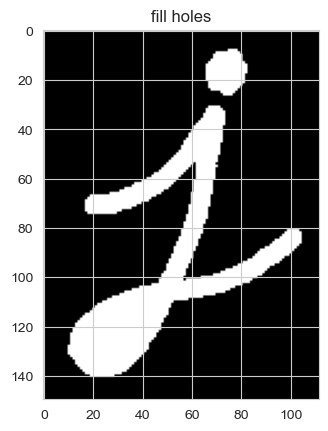

In [34]:
im_fill = fillhole(img)

plt.imshow(im_fill,cmap='gray')
plt.title('fill holes')
plt.show()


# Skeletization

By [N. Reddy](https://medium.com/analytics-vidhya/skeletonization-in-python-using-opencv-b7fa16867331)

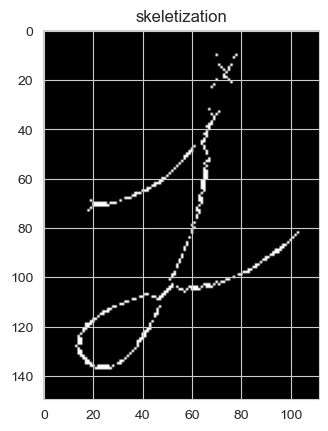

In [35]:

# Step 1: Create an empty skeleton
size = np.size(img)
skel = np.zeros(img.shape, np.uint8)

# Get a Cross Shaped Kernel
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Repeat steps 2-4
while True:
    #Step 2: Open the image
    open = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)
    #Step 3: Substract open from the original image
    temp = cv2.subtract(img, open)
    #Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(img, element)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
    # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(img)==0:
        break

plt.imshow(skel,cmap='gray')
plt.title('skeletization')
plt.show()


# Gradiente morfológico

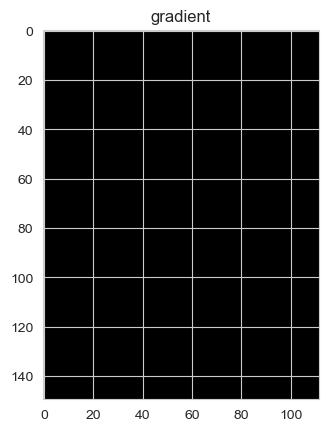

In [36]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient,cmap='gray')
plt.title('gradient')
plt.show()

# Operaciones morfológicas con imágenes en tonos de gris

In [ ]:
!wget https://www.dropbox.com/s/lma4xmmcovg8r1z/tazmania.png?dl=0

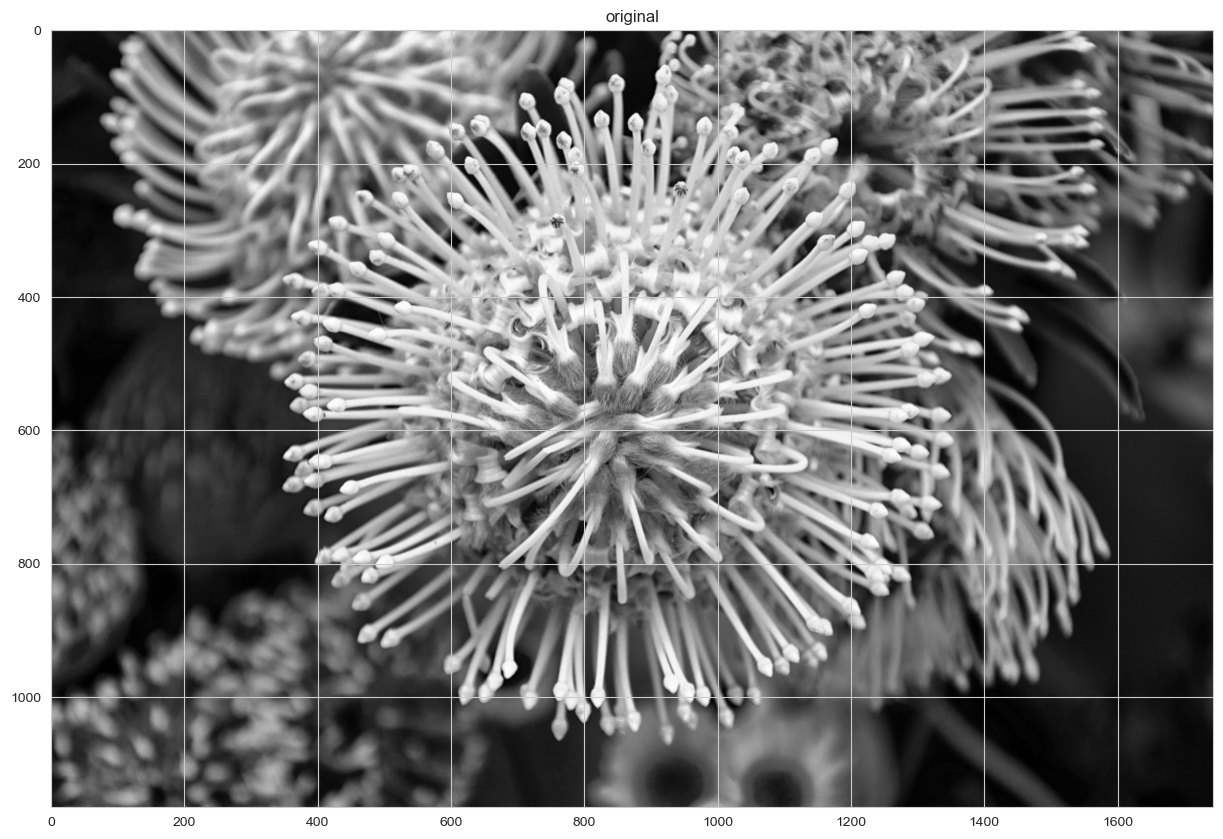

In [37]:
img = cv2.imread('tazmania.png',0)
plt.figure(figsize=(15,18))
plt.imshow(img,cmap='gray')
plt.title('original')
plt.show()


In [38]:
n = 7
kernel = np.ones((n,n),np.uint8)

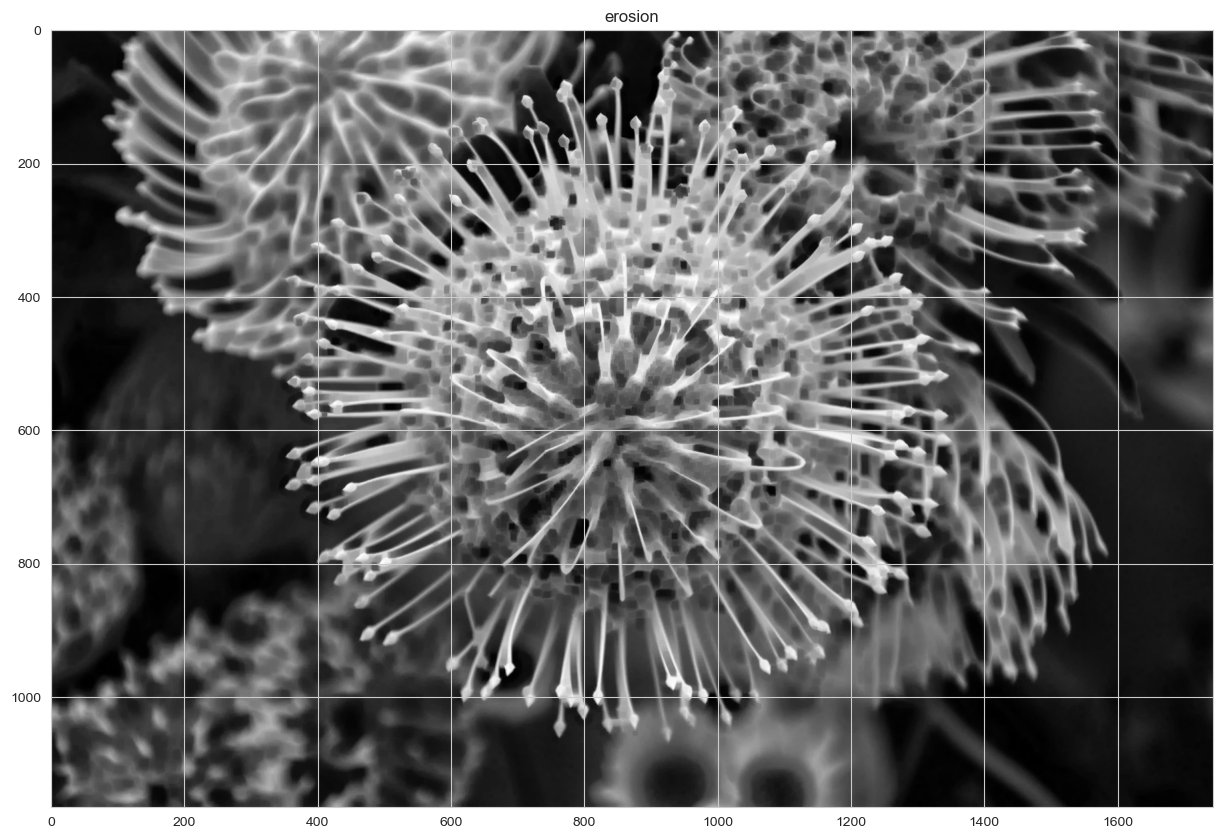

In [39]:
erosion = cv2.erode(img,kernel,iterations = 1)
plt.figure(figsize=(15,18))
plt.imshow(erosion,cmap='gray')
plt.title('erosion')
plt.show()


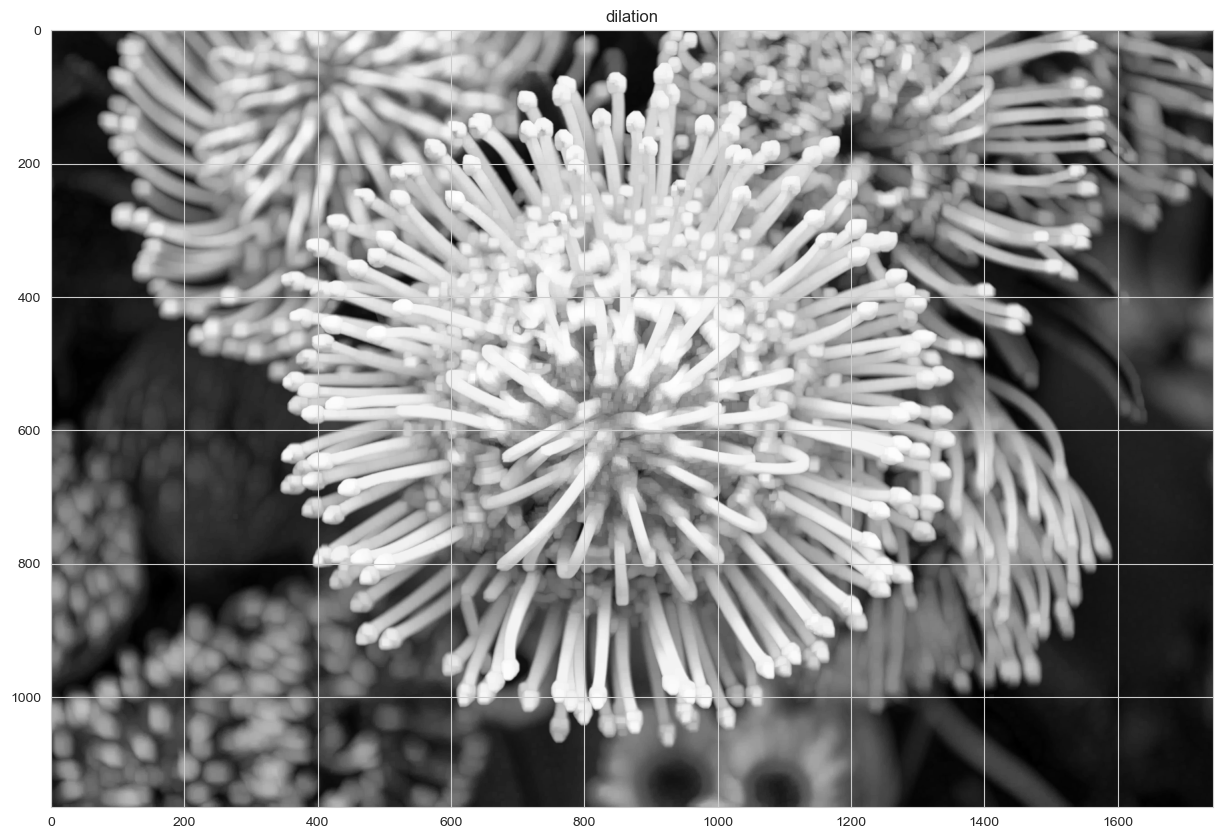

In [40]:
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.figure(figsize=(15,18))
plt.imshow(dilation,cmap='gray')
plt.title('dilation')
plt.show()


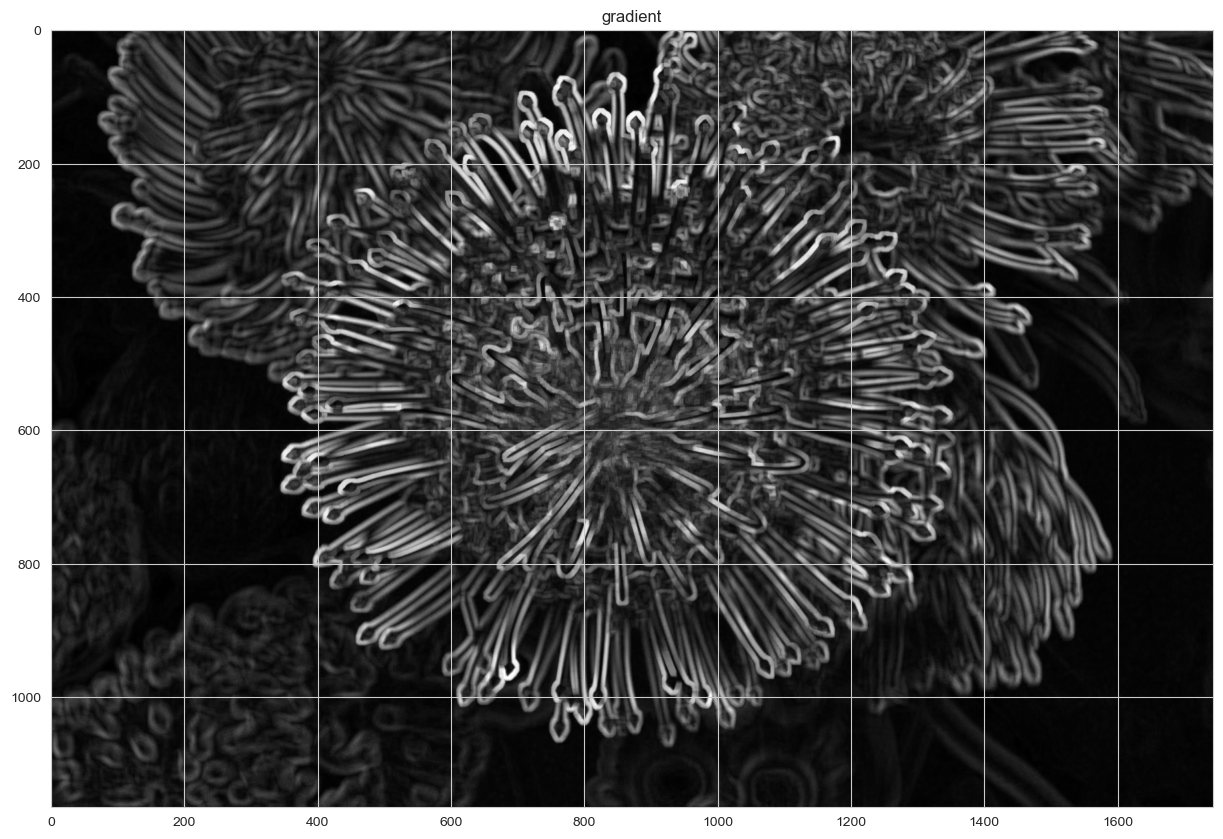

In [41]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(15,18))
plt.imshow(gradient,cmap='gray')
plt.title('gradient')
plt.show()

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).